<a href="https://colab.research.google.com/github/sfarheen28/app_predictive_modeling/blob/main/APL_preprocess_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Q1: glass data

In [ ]:
# @title Data pull
from ucimlrepo import fetch_ucirepo

glass_identification = fetch_ucirepo(id=42)

X = glass_identification.data.features
y = glass_identification.data.targets

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

,Type_of_glass
0,1
1,1
2,1
3,1
4,1


In [ ]:
y['Type_of_glass'].value_counts(sort = True)

,count
Type_of_glass,
2,76
1,70
7,29
3,17
5,13
6,9


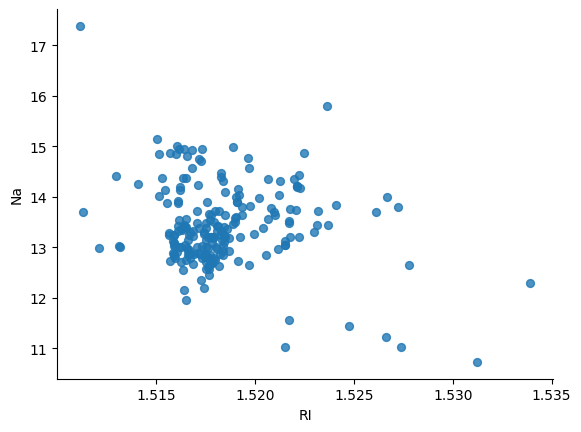

In [ ]:
# @title RI vs Na

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='RI', y='Na', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

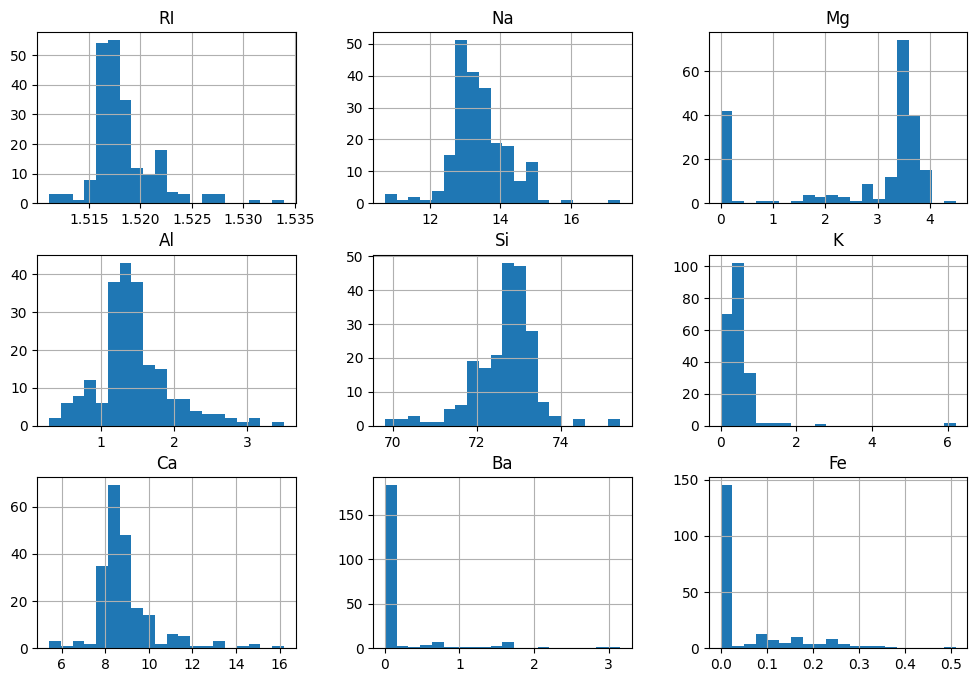

In [ ]:
# @title Histogram

X.hist(bins=20, figsize=(12, 8))

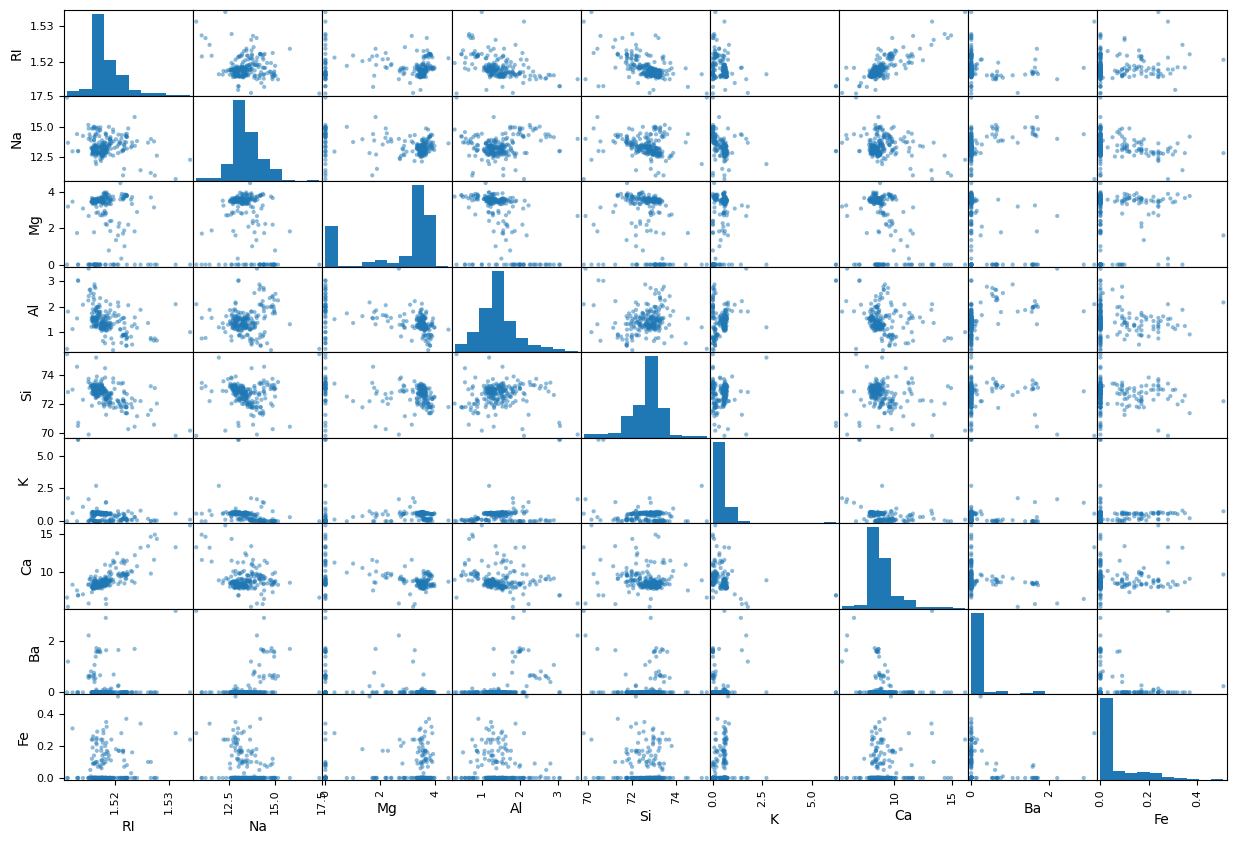

In [ ]:
# @title Scatter Matrix

from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize = (15,10))
plt.show()

In [ ]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Type_of_glass,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


In [ ]:
glass = pd.concat([X, y], axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.52,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.52,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.52,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.52,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1


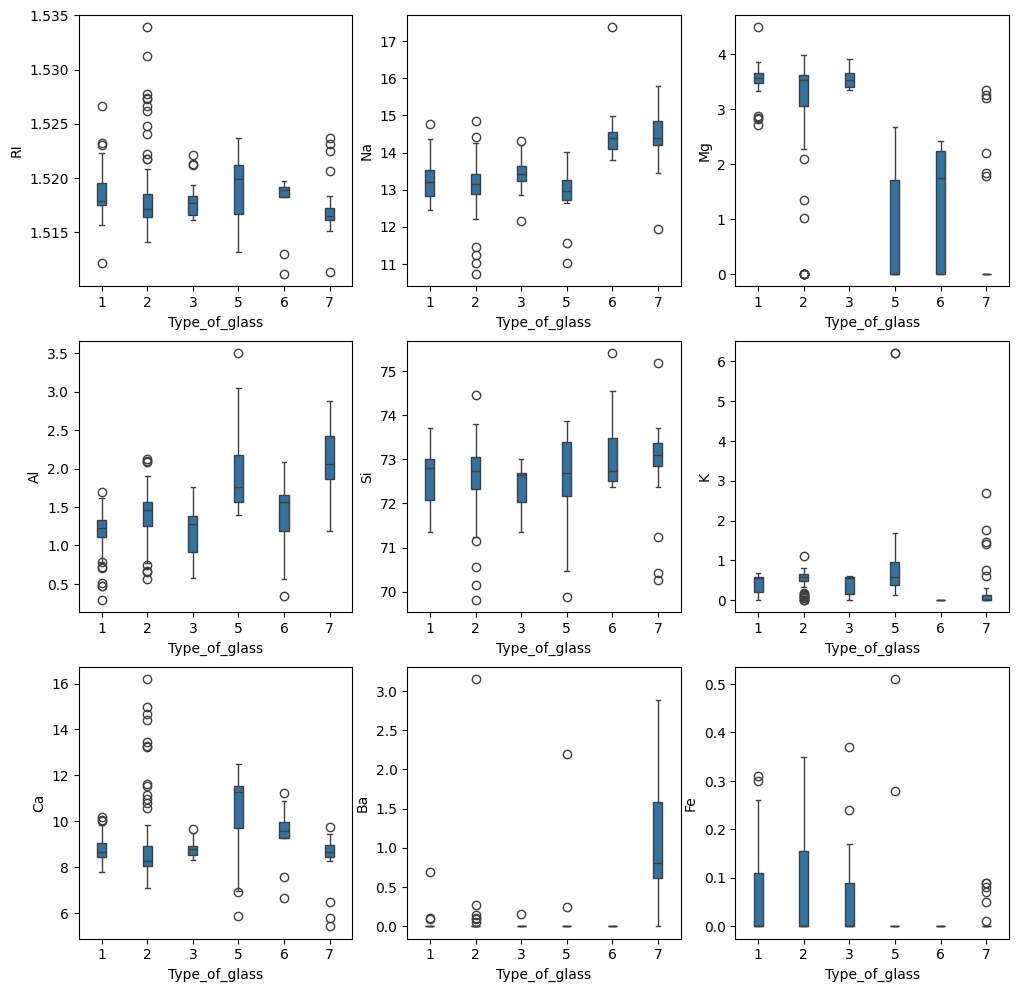

In [ ]:
# @title Box Plot
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize = (12,12))
flattened_axes = fig.axes

for i, var in enumerate(X.columns):
    ax = flattened_axes[i]
    sns.boxplot(y=var, x = glass['Type_of_glass'], width=0.2, data=glass, ax=ax, showfliers=True)

In [ ]:
pd.options.display.float_format = "{:,.2f}".format
pd.DataFrame({'max': X.max(), 'ratio': X.max()/(X.min()+0.000001), 'min': X.min(),
              'sqrt max': np.sqrt(X.max()), 'sqrt min': np.sqrt(X.min())})

,max,ratio,min,sqrt max,sqrt min
RI,1.53,1.02,1.51,1.24,1.23
Na,17.38,1.62,10.73,4.17,3.28
Mg,4.49,"4,490,000.00",0.00,2.12,0.00
Al,3.50,12.07,0.29,1.87,0.54
Si,75.41,1.08,69.81,8.68,8.36
K,6.21,"6,210,000.00",0.00,2.49,0.00
Ca,16.19,2.98,5.43,4.02,2.33
Ba,3.15,"3,150,000.00",0.00,1.77,0.00
Fe,0.51,"510,000.00",0.00,0.71,0.00


In [ ]:
X.skew()

,0
RI,1.63
Na,0.45
Mg,-1.15
Al,0.91
Si,-0.73
K,6.55
Ca,2.05
Ba,3.42
Fe,1.75


In [ ]:
X_scaled = X.copy()
for column in X_scaled.columns:
    X_scaled[column] = np.sqrt(X_scaled[column])

In [ ]:
X_scaled.skew()

,0
RI,1.619143
Na,0.242897
Mg,-1.365097
Al,0.092350
Si,-0.765323
K,0.871221
Ca,1.572031
Ba,2.377201
Fe,1.053218


In [ ]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
X_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.232219,3.659995,1.459659,1.184225,8.523431,0.604720,2.984419,0.161251,0.131647
std,0.001231,0.111094,0.746009,0.206679,0.045528,0.363300,0.224598,0.386969,0.199661
min,1.229288,3.275668,0.000000,0.538516,8.355238,0.000000,2.330236,0.000000,0.000000
25%,1.231472,3.592700,1.454229,1.090871,8.501765,0.349946,2.870540,0.000000,0.000000
50%,1.231942,3.646917,1.865476,1.166190,8.531706,0.744976,2.932576,0.000000,0.000000
75%,1.232541,3.718198,1.897367,1.276715,8.549123,0.781025,3.028613,0.000000,0.316228
max,1.238519,4.168933,2.118962,1.870829,8.683893,2.491987,4.023680,1.774824,0.714143


In [ ]:
X_scaled.skew()

,0
RI,0.000000
Na,-0.004880
Mg,-1.500913
Al,0.070238
Si,0.130526
K,-1.303300
Ca,-0.193596
Ba,1.699390
Fe,0.742532


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

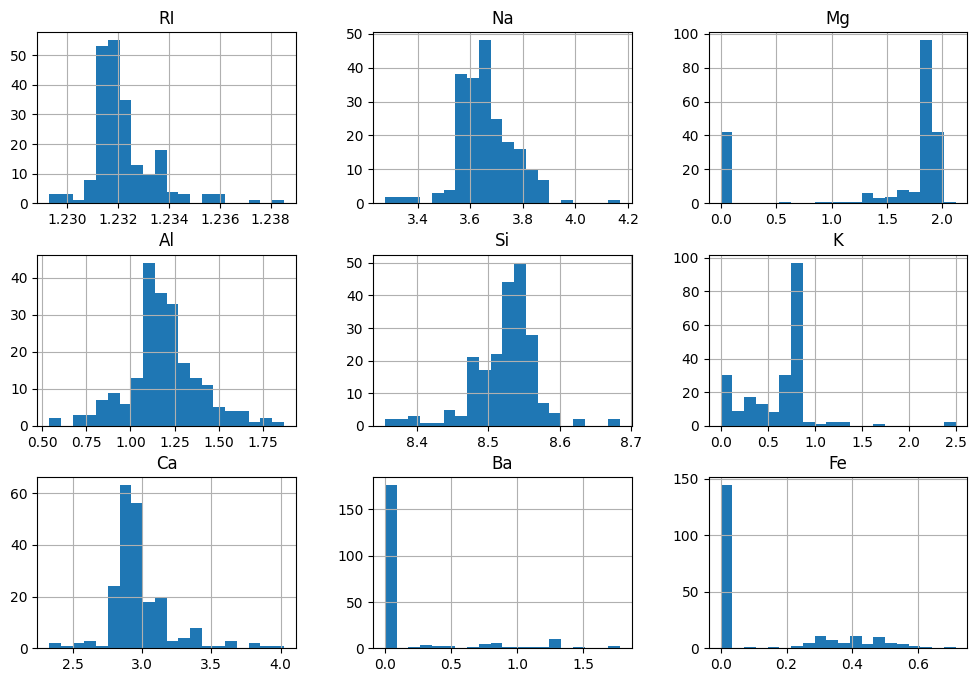

In [ ]:
X_scaled.hist(bins=20, figsize=(12, 8))

In [ ]:
from scipy import stats
for column in X_scaled.columns:
    X_scaled[column], fit_lambda = stats.boxcox(X[column]+0.00000000001)

# Q2: Soybean

In [ ]:
# @title Data pull

from ucimlrepo import fetch_ucirepo

# fetch dataset
soybean_large = fetch_ucirepo(id=90)

# data (as pandas dataframes)
X = soybean_large.data.features
y = soybean_large.data.targets

# metadata
print(soybean_large.metadata)

# variable information
print(soybean_large.variables)

{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

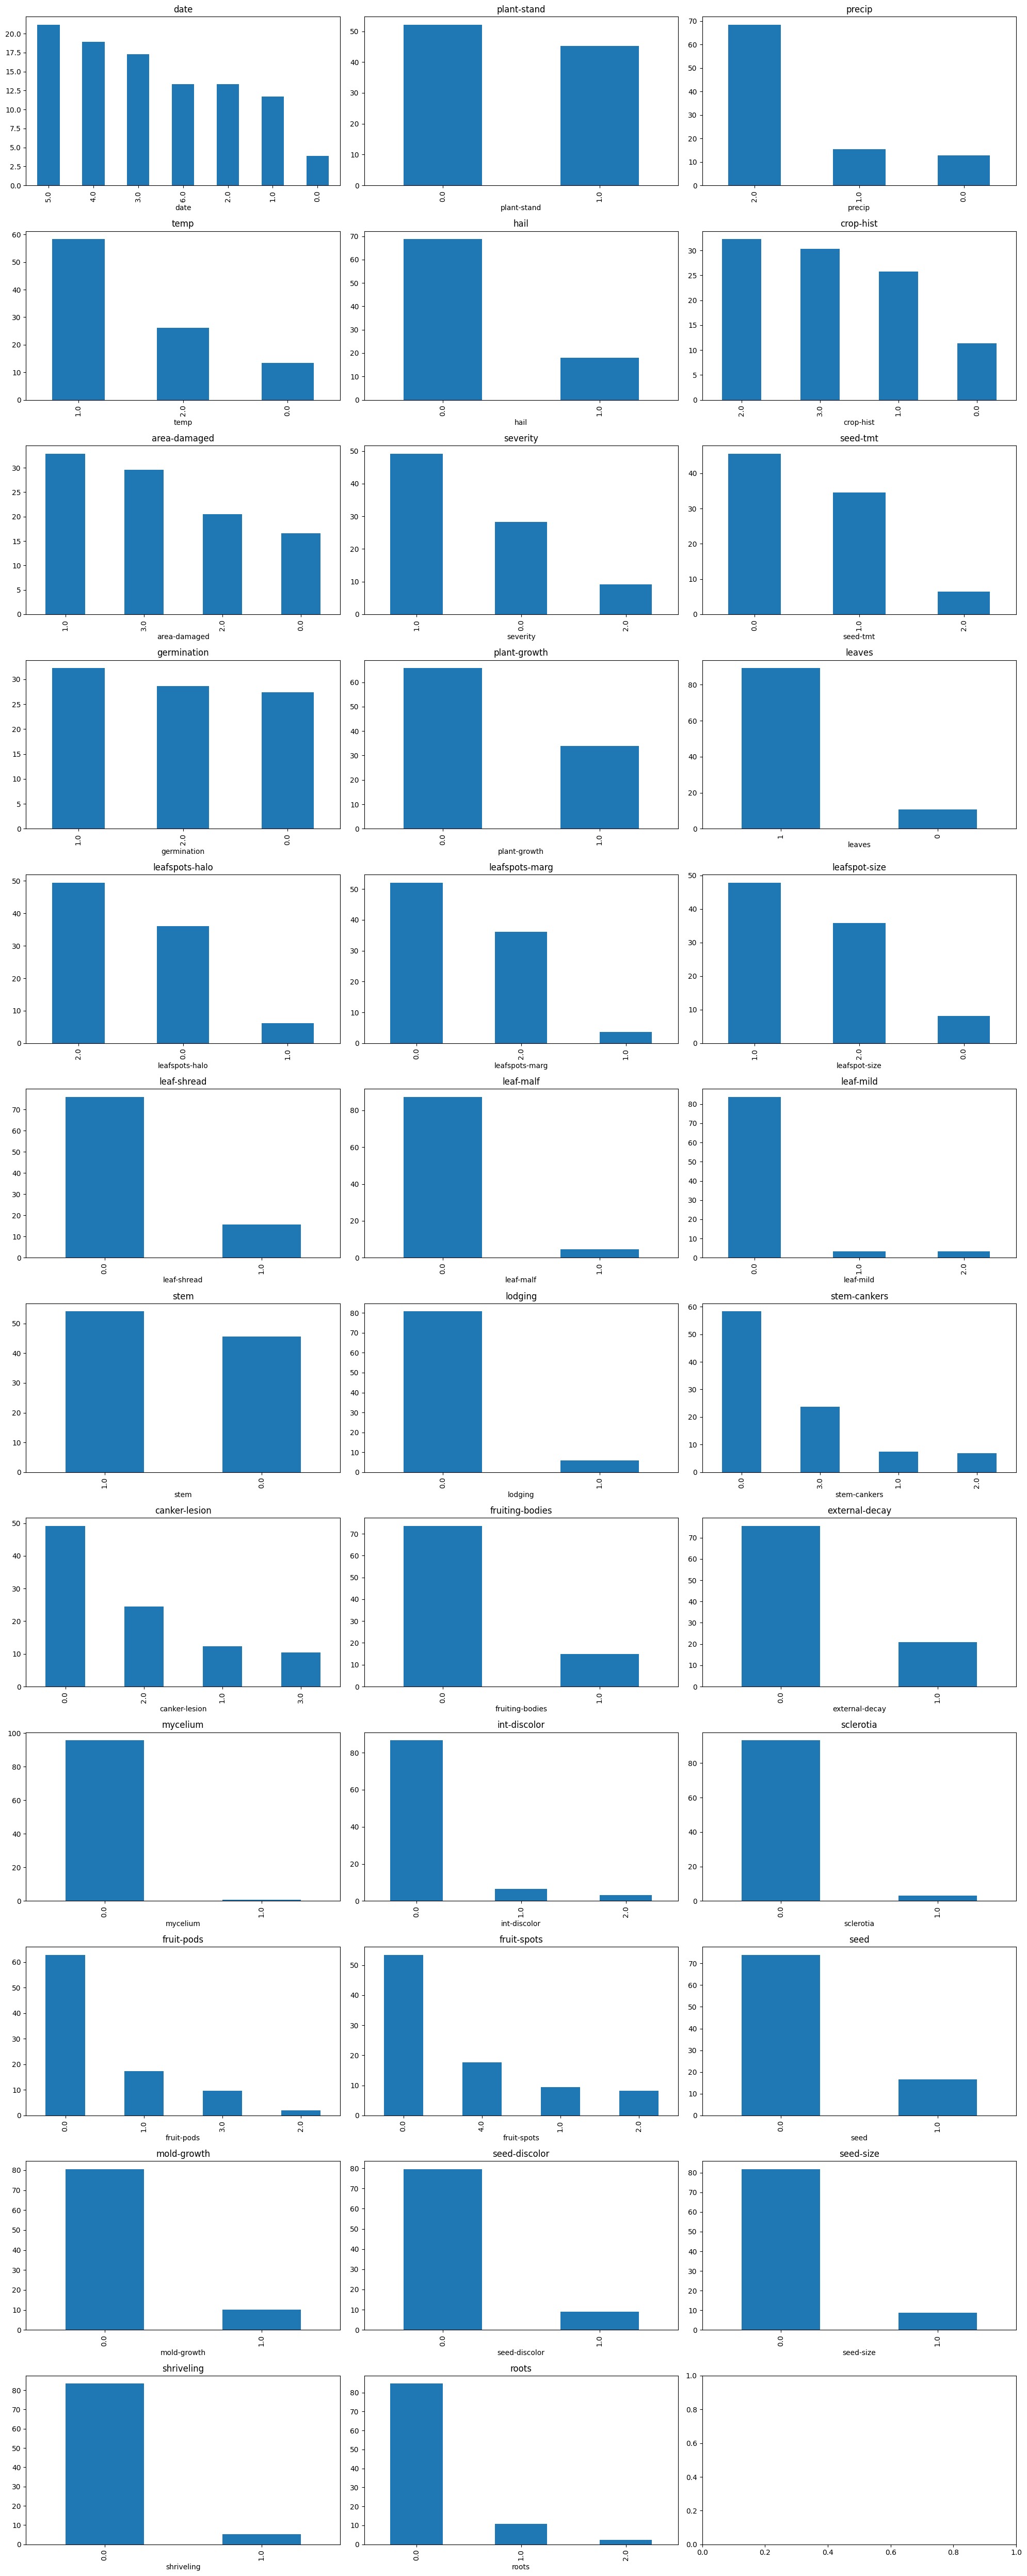

In [ ]:
# @title Frequency Distribution

fig, axes = plt.subplots(12, 3, figsize=(20, 50)) # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easier iteration

for i, categorical_feature in enumerate(X):
    (X[categorical_feature].value_counts()*100/len(X)).plot(kind = "bar", ax=axes[i]).set_title(categorical_feature)

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

In [ ]:
# @title Missing values
X.isnull().sum()*100/len(X)

,0
date,0.325733
plant-stand,2.605863
precip,3.583062
temp,2.280130
hail,13.355049
crop-hist,0.325733
area-damaged,0.325733
severity,13.355049
seed-tmt,13.355049
germination,11.726384


In [ ]:
soy = pd.concat([X, y], axis=1)

In [ ]:
soy.pivot_table(index="class", aggfunc= (lambda x: x.isna().sum())).sum()*100/soy.pivot_table(index="class", aggfunc= 'count').sum()

,0
area-damaged,0.326797
canker-lesion,3.716216
crop-hist,0.326797
date,0.326797
external-decay,3.716216
fruit-pods,8.865248
fruit-spots,12.867647
fruiting-bodies,12.867647
germination,13.284133
hail,15.413534


In [ ]:
# @title KNN for imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
X_imputed = pd.DataFrame(imputer.fit_transform(X))
X_imputed.columns = X.columns